# Step 3: Vectorize




In [6]:
import pandas as pd
#Reading data from step 2
fields = ['Type', 'IE', 'NS', 'FT', 'PJ', 'Posts_Lemmatized']
mbti_Dataset = pd.read_pickle('mbti_Dataset2.pkl')
mbti_Dataset = mbti_Dataset.filter(fields)
mbti_Dataset.head()

,Type,IE,NS,FT,PJ,Posts_Lemmatized
0,INFJ,I,N,F,J,"[, moment, sportscenter, top, ten, play, prank..."
1,ENTP,E,N,T,P,"[finding, lack, post, alarming, sex, boring, p..."
2,INTP,I,N,T,P,"[good, one, course, say, know, blessing, curse..."
3,INTJ,I,N,T,J,"[dear, enjoyed, conversation, day, esoteric, g..."
4,ENTJ,E,N,T,J,"[fired, another, silly, misconception, approac..."


## 3-1: Count Vectorization

In [3]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer

def lemmatizing(text):
    """Lemmatizing the input text using WordNet and NLTK package"""
    NLTK_WNL = nltk.WordNetLemmatizer()
    text_Lem = [NLTK_WNL.lemmatize(word) for word in text]
    return(text_Lem)


#Sample 10 first rows of the data and copy it to a temp dataset to be able to validate the result better
small_Data = mbti_Dataset.loc[0:10,['Posts_Lemmatized']]
small_countvec = CountVectorizer(analyzer=lemmatizing)
small_Lem_CV = small_countvec.fit_transform(small_Data['Posts_Lemmatized'])

print('List of first 50 features: \n', small_countvec.get_feature_names()[0:50])
print('\nList of last 50 features: \n', small_countvec.get_feature_names()[-50:])
print('\n Sample Shape(CountVectorizer) : ', small_Lem_CV.shape)

List of first 50 features: 
 ['', 'a', 'abandoned', 'ability', 'able', 'abrupt', 'absence', 'absolute', 'absolutely', 'absolutezero', 'absurd', 'abuse', 'accepted', 'accident', 'accomplished', 'according', 'accurate', 'ace', 'achieving', 'acid', 'acknowledge', 'acknowledging', 'acoustic', 'act', 'action', 'actress', 'actual', 'actually', 'acutely', 'add', 'addictive', 'address', 'admiration', 'admit', 'adobe', 'advancement', 'advent', 'adventure', 'advice', 'advocate', 'affair', 'affect', 'affectionate', 'age', 'aggressive', 'ago', 'agonizingly', 'agree', 'agreed', 'agreement']

List of last 50 features: 
 ['worka', 'worked', 'workin', 'working', 'world', 'worried', 'worry', 'worse', 'worst', 'worth', 'worthwhile', 'would', 'wow', 'wrath', 'wrestling', 'writer', 'writing', 'written', 'wrong', 'wrote', 'wylde', 'x', 'xbox', 'xd', 'xfiles', 'xingkes', 'xtctr', 'xxfps', 'ya', 'yeah', 'year', 'yearold', 'yeehaw', 'yellow', 'yep', 'yes', 'yet', 'yikes', 'yippy', 'yo', 'young', 'younger', 'y

In [4]:
small_Lem_DF = pd.DataFrame(small_Lem_CV.toarray())
small_Lem_DF.columns = small_countvec.get_feature_names()
small_Lem_DF.head()

,,a,abandoned,ability,able,abrupt,absence,absolute,absolutely,absolutezero,...,young,younger,youtubing,yr,yup,zakk,zombie,zone,zoom,â
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,2,1,1,0,0,2,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
from sklearn.feature_extraction.text import CountVectorizer

#Running CountVectorizer on full dataset
count_Vec = CountVectorizer(analyzer=lemmatizing)
full_Lem_CV = count_Vec.fit_transform(mbti_Dataset['Posts_Lemmatized'])

print('Shape of CountVectorizer(full dataset):  ',full_Lem_CV.shape)

Shape of CountVectorizer(full dataset):   (8675, 135767)


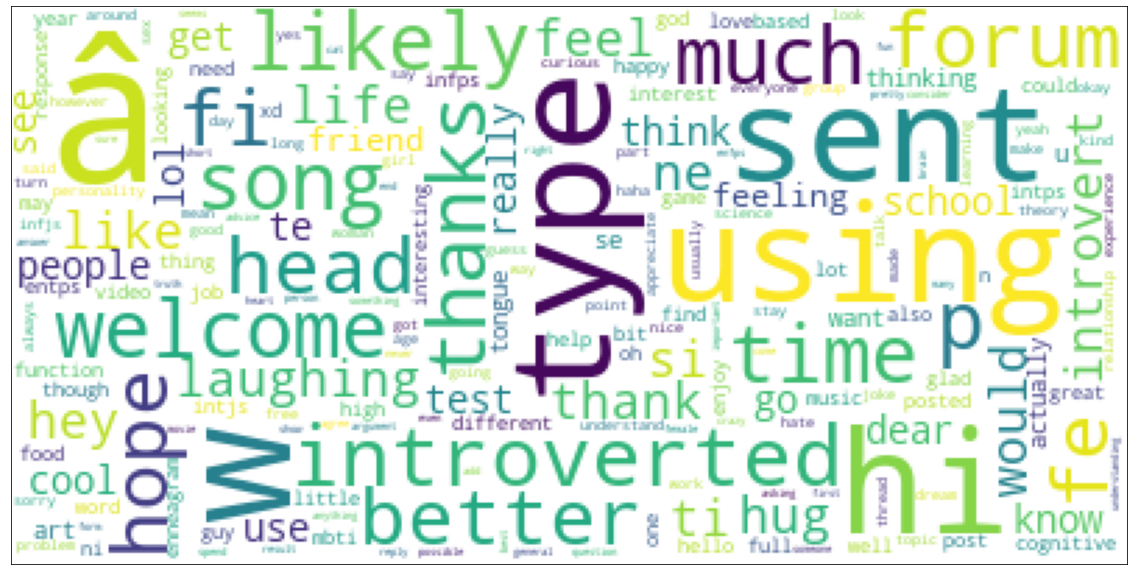

In [164]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def get_count_rank(top_k_words=500, file_path=None):
    count_Vec = CountVectorizer(max_features=top_k_words, analyzer=lemmatizing)  # Defaults
    weight = count_Vec.fit_transform(mbti_Dataset['Posts_Lemmatized']).toarray()
    word = count_Vec.get_feature_names()
    word_fre = {}
    for i in range(len(weight)):
        for j in range(len(word)):
            if word[j] not in word_fre:
                word_fre[word[j]] = weight[i][j]
            else:
                word_fre[word[j]] = max(word_fre[word[j]], weight[i][j])
    return word_fre

def show_word_cloud(word_fre):
    word_cloud = WordCloud(background_color='white', max_font_size=70)
    word_cloud.fit_words(word_fre)
    plt.figure(figsize=(20,15))
    plt.imshow(word_cloud)
    plt.xticks([])#Remove the abscissa
    plt.yticks([])#Remove the ordinate
    plt.show()

show_word_cloud(get_count_rank())


## 3-2: N-gram Vectorizing

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

#Sample 10 first rows of the data and copy it to a temp dataset to be able to validate the result better
small_Data = mbti_Dataset.loc[0:10,['Type','Posts_Lemmatized']]
small_Ngram = CountVectorizer(ngram_range=(1,3))#Max N-Gram is set to 3
temp_Dataset = small_Data['Posts_Lemmatized'].apply(lambda x: ' '.join(map(str,x)))
small_Lem_Ngram = small_Ngram.fit_transform(temp_Dataset)

print('List of first 50 features: \n', small_Ngram.get_feature_names()[0:50])
print('\nList of last 50 features: \n', small_Ngram.get_feature_names()[-50:])
print('\n Sample Shape for 3-grams: ', small_Lem_Ngram.shape)


List of first 50 features: 
 ['abandoned', 'abandoned building', 'abandoned building old', 'abandoned ni', 'abandoned ni age', 'ability', 'ability generate', 'ability generate idea', 'ability give', 'ability give birth', 'able', 'able build', 'able build building', 'able lol', 'able look', 'able look painting', 'able read', 'able read interpret', 'able relate', 'able relate feeling', 'able stop', 'able stop started', 'abrupt', 'abrupt explosion', 'abrupt explosion laughter', 'absence', 'absence religion', 'absence religion people', 'absolute', 'absolute admiration', 'absolute admiration refreshing', 'absolutely', 'absolutely know', 'absolutely know tf', 'absolutely love', 'absolutely love true', 'absolutely neutral', 'absolutely neutral face', 'absolutely positive', 'absolutely positive best', 'absolutely terrifies', 'absolutely terrifies lose', 'absolutezero', 'absolutezero comprehension', 'absolutezero comprehension requiring', 'absurd', 'absurd thing', 'absurd thing like', 'abuse', 

In [7]:
small_Ngram_DF = pd.DataFrame(small_Lem_Ngram.toarray())
small_Ngram_DF.columns = small_Ngram.get_feature_names()
small_Ngram_DF.head()

,abandoned,abandoned building,abandoned building old,abandoned ni,abandoned ni age,ability,ability generate,ability generate idea,ability give,ability give birth,...,zakk wylde musical,zombie,zombie moth,zombie moth attracted,zone,zone sake,zone sake emotional,zoom,zoom fact,zoom fact question
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
from sklearn.feature_extraction.text import CountVectorizer

#Running N-Gram on full dataset (Max = 3)
full_Ngram = CountVectorizer(ngram_range=(1,3))
temp_Dataset = mbti_Dataset['Posts_Lemmatized'].apply(lambda x: ' '.join(map(str,x)))
full_Lem_Ngram = full_Ngram.fit_transform(temp_Dataset)

print('Shape of 3-Grams(full dataset):', full_Lem_Ngram.shape)


Shape of 3-Grams(full dataset): (8675, 7157205)


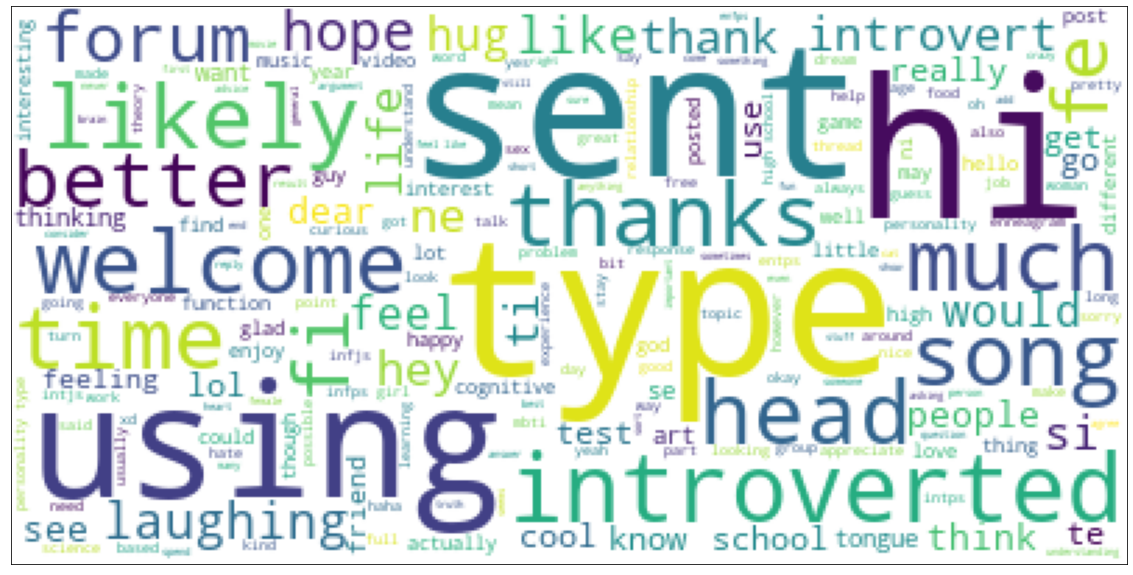

In [29]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

#This part of code was taken from https://www.programmersought.com/article/41495861967/
def get_ngram_rank(top_k_words=500, file_path=None):
    full_Ngram = CountVectorizer(max_features=top_k_words, ngram_range=(1,3))  # Defaults
    temp_Dataset = mbti_Dataset['Posts_Lemmatized'].apply(lambda x: ' '.join(map(str,x)))
    weight = full_Ngram.fit_transform(temp_Dataset).toarray()
    word = full_Ngram.get_feature_names()
    word_fre = {}
    for i in range(len(weight)):
        for j in range(len(word)):
            if word[j] not in word_fre:
                word_fre[word[j]] = weight[i][j]
            else:
                word_fre[word[j]] = max(word_fre[word[j]], weight[i][j])
    return word_fre

def show_word_cloud(word_fre):
    word_cloud = WordCloud(background_color='white', max_font_size=70)
    word_cloud.fit_words(word_fre)
    plt.figure(figsize=(20,15))
    plt.imshow(word_cloud)
    plt.xticks([])#Remove the abscissa
    plt.yticks([])#Remove the ordinate
    plt.show()

show_word_cloud(get_ngram_rank())


## 3-3: Invers Document Frequency Weighting
####        tf-idf(t, d) = tf(t, d) * log(N/(df + 1))

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Sample 10 first rows of the data and copy it to a temp dataset to be able to validate the result better
small_Data = mbti_Dataset.loc[0:10,['Type','Posts_Lemmatized']]
small_TFIDF = TfidfVectorizer(analyzer=lemmatizing)
small_Lem_TFIDF = small_TFIDF.fit_transform(small_Data['Posts_Lemmatized'])

print('List of first 50 features: \n', small_TFIDF.get_feature_names()[0:50])
print('\nList of last 50 features: \n', small_TFIDF.get_feature_names()[-50:])
print('\n Shape for TFIDF Vectorizer(Sample): ', small_Lem_TFIDF.shape)

List of first 50 features: 
 ['', 'a', 'abandoned', 'ability', 'able', 'abrupt', 'absence', 'absolute', 'absolutely', 'absolutezero', 'absurd', 'abuse', 'accepted', 'accident', 'accomplished', 'according', 'accurate', 'ace', 'achieving', 'acid', 'acknowledge', 'acknowledging', 'acoustic', 'act', 'action', 'actress', 'actual', 'actually', 'acutely', 'add', 'addictive', 'address', 'admiration', 'admit', 'adobe', 'advancement', 'advent', 'adventure', 'advice', 'advocate', 'affair', 'affect', 'affectionate', 'age', 'aggressive', 'ago', 'agonizingly', 'agree', 'agreed', 'agreement']

List of last 50 features: 
 ['worka', 'worked', 'workin', 'working', 'world', 'worried', 'worry', 'worse', 'worst', 'worth', 'worthwhile', 'would', 'wow', 'wrath', 'wrestling', 'writer', 'writing', 'written', 'wrong', 'wrote', 'wylde', 'x', 'xbox', 'xd', 'xfiles', 'xingkes', 'xtctr', 'xxfps', 'ya', 'yeah', 'year', 'yearold', 'yeehaw', 'yellow', 'yep', 'yes', 'yet', 'yikes', 'yippy', 'yo', 'young', 'younger', 'y

In [10]:
small_TFIDF_DF = pd.DataFrame(small_Lem_TFIDF.toarray())
small_TFIDF_DF.columns = small_TFIDF.get_feature_names()
small_TFIDF_DF.head()

,,a,abandoned,ability,able,abrupt,absence,absolute,absolutely,absolutezero,...,young,younger,youtubing,yr,yup,zakk,zombie,zone,zoom,â
0,0.035998,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
1,0.000000,0.000000,0.035859,0.000000,0.025443,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
2,0.031991,0.000000,0.000000,0.105497,0.031991,0.052748,0.0,0.000000,0.079304,0.0,...,0.0,0.0,0.0,0.0,0.052748,0.0,0.0,0.0,0.0,0.052748
3,0.000000,0.000000,0.000000,0.000000,0.054287,0.000000,0.0,0.044755,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
4,0.000000,0.047334,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Running TFIDF on full dataset
vectorizer_TFIDF = TfidfVectorizer(analyzer=lemmatizing)
full_Lem_tfidf = vectorizer_TFIDF.fit_transform(mbti_Dataset['Posts_Lemmatized'])

print('Shape of TFIDF(full dataset):', full_Lem_tfidf.shape)

Shape of TFIDF(full dataset): (8675, 135767)


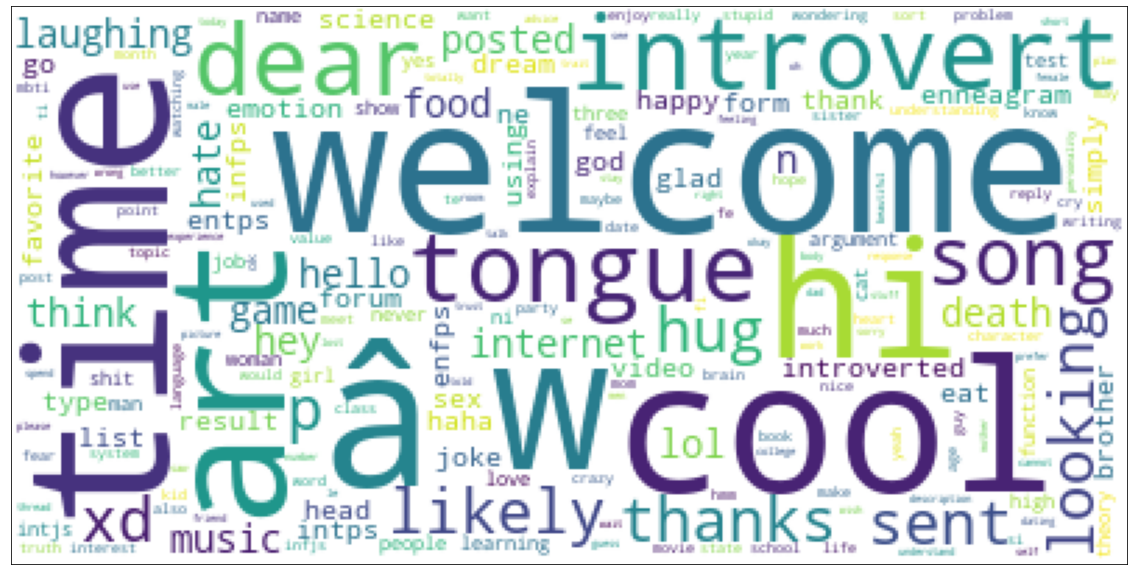

In [114]:
#This part of code was taken from https://www.programmersought.com/article/41495861967/

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def get_tf_idf_rank(top_k_words=500, file_path=None):
    tfidf = TfidfVectorizer(max_features=top_k_words, analyzer=lemmatizing)  # Defaults
    weight = tfidf.fit_transform(mbti_Dataset['Posts_Lemmatized']).toarray()
    word = tfidf.get_feature_names()
    word_fre = {}
    for i in range(len(weight)):
        for j in range(len(word)):
            if word[j] not in word_fre:
                word_fre[word[j]] = weight[i][j]
            else:
                word_fre[word[j]] = max(word_fre[word[j]], weight[i][j])
    return word_fre

def show_word_cloud(word_fre):
    word_cloud = WordCloud(background_color='white', max_font_size=70)
    word_cloud.fit_words(word_fre)
    plt.figure(figsize=(20,15))
    plt.imshow(word_cloud)
    plt.xticks([])#Remove the abscissa
    plt.yticks([])#Remove the ordinate
    plt.show()

show_word_cloud(get_tf_idf_rank())